Display Qat and Doq statevectors on the Bloch sphere.

numpy is imported as npa to avoid interfering with PennyLane numpy.

The following functions do not require a quantum state from Qiskit or PennyLane to be provided as input:

- To_Bloch() returns the Bloch vector coordinates given a statevector (complex vector) as input.

- random_bloch_pts() creates a list of random Bloch vector coordinates.
  It is derived from random_qstates() in qhack21/hackaton/datas/State preparation.ipynb

- plot_bloch_qcats_qdogs() plots Qat quantum states as red points and DoQ quantum states as blue points on the Bloch sphere
  drawn as a figure with matplotlib.
  It is derived from plot_two_groups_of_qstates() in qhack21/hackaton/datas/State preparation.ipynb
  
Examples taken from qhack21/hackaton/datas/State preparation.ipynb are used for testing these display functions.

In [1]:
# Comment this out if you don't want to install matplotlib from this notebook
#!pip install matplotlib

# Comment this out if you don't want to install pylatexenc from this notebook
#!pip install pylatexenc

http://qutip.org/docs/4.1/guide/guide-bloch.html

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize']=(12,8)

In [4]:
import numpy as npa # to avoid interfering with Pennylane numpy

from numpy.random import default_rng
# rng = default_rng(seed) # seed for reproducibility

In [5]:
import cmath
import math
from math import pi
_EPS = 1e-10  # global variable used to chop very small numbers to zero

In [6]:
# This function chops real numbers 
def chop(U, abs_tol=_EPS):
    Real_U = U
    if npa.abs(U) < abs_tol :
        Real_U = 0.0
    return Real_U

In [7]:
# This code is contributed by Alain Chancé
#
# This function returns Bloch coordinates given a statevector (complex vector) as input
#
# A normalized pure state |𝜓> = 𝛼|0> + 𝛽|1> can be written |𝜓> = cos𝜃/2 |0> + 𝑒xp(𝑖𝜑) * sin𝜃/2 |1> 
# where, since the arccosine of a positive number is a first quadrant angle:
# 𝜃 = 2 * cos**(−1) |𝛼|, 𝜃/2 ∈ [0, 𝜋/2]
# 𝜑 = arg(𝛽) − arg(𝛼), 𝜑 ∈ [0,2𝜋]
# A pure state |𝜓> can be represented by a vector on the so-called Bloch sphere with the following coordinates: 
# 𝑟 = [sin𝜃 * cos𝜑, sin𝜃 * sin𝜑, cos𝜃]
#
def ToBloch(s, check_amplitudes = True):
    
    # Input: params (list): vector of complex amplitudes
    # Output: 𝜃, 𝜑, r = [sin𝜃 * cos𝜑, sin𝜃 * sin𝜑, cos𝜃]
    
    num_qubits = math.log2(len(s))
    
    # Check if param is a power of 2
    if num_qubits == 0 or not num_qubits.is_integer():
        raise Exception("Desired statevector (complex vector) length not a positive power of 2.")
    
    num_qubits = int(num_qubits)
    
    if num_qubits > 1:
        raise Exception("Only one statevector is allowed as input.")
    
    # Check if probabilities (amplitudes squared) sum to 1
    if check_amplitudes:
        if not math.isclose(sum(npa.absolute(s) ** 2), 1.0, abs_tol=_EPS):
            raise Exception("Sum of amplitudes-squared does not equal one.")
    
    phi = cmath.phase(s[1]) - cmath.phase(s[0])
    phi = chop(phi)
        
    theta = chop(2*math.acos(abs(s[0])))
    
    r1 = chop(math.sin(theta)*math.cos(phi))
    r2 = chop(math.sin(theta)*math.sin(phi))
    r3 = chop(math.cos(theta))
    r = (r1,r2,r3)
    
    return theta, phi, r

In [8]:
statevector = [1/math.sqrt(2),complex(0.0, 1/math.sqrt(2))]
print("Input statevector :", statevector)
(theta, phi, r) = ToBloch(statevector)
print("phi ", phi)
print("theta: ", theta)
print("r ", r)

Input statevector : [0.7071067811865475, 0.7071067811865475j]
phi  1.5707963267948966
theta:  1.5707963267948968
r  (0.0, 1.0, 0.0)


In [9]:
def random_bloch_pts(theta_1, theta_2, phi_1, phi_2, rng_seed=None, distr='uniform', size=10):
    # Derived from random_qstates() in qhack21/hackaton/datas/State preparation.ipynb
    
    '''
    Creates a list of random Bloch vector coordinates with angles drawn from a uniform distribution
    with some restricted range [a,b] obtained with (b - a) * random() + a or a normal distribution with mean/variance
    '''
    
    # Input
    # theta_1: lower bound of angle theta
    # theta_2: Upper bound of angle theta
    # phi_1: lower bound of angle phi
    # phi_2: Upper bound of angle phi
    # rng_seed: range of seed for randum function
    # distr: 'uniform' or 'normal'
    # size: number of random Bloch points
    
    # Output
    # coords: Bloch vector coordinates [sin𝜃 * cos𝜑, sin𝜃 * sin𝜑, cos𝜃]
    # angles: angles θ, ϕ, λ
    
    ## pick parameters at random
    rng = default_rng(rng_seed)
    params = (theta, phi)
    state = []
    x, y, z = [], [], []
    
    if distr=='uniform':
        θ = rng.random(size)*(theta_2-theta_1)+theta_1
        ϕ = rng.random(size)*(phi_2-phi_1)+phi_1
        λ = rng.random(size)*2*pi
    elif distr=='normal':
        θ = rng.normal(loc=theta_1, scale=theta_2, size=size)
        ϕ = rng.normal(loc=phi_1, scale=phi_2, size=size)
        λ = rng.random(size)*2*pi
        
    angles = [list(a) for a in zip(θ, ϕ, λ)]

    x = npa.sin(θ)*npa.cos(ϕ)
    y = npa.sin(θ)*npa.sin(ϕ)
    z = npa.cos(θ)
    coords = [c for c in zip(x, y, z)]
    
    return coords, angles

In [10]:
def plot_bloch_qcats_qdogs(x0, y0, z0, x1, y1, z1, marker='o'):
    # Display Qat and DoQ quantum states on Bloch sphere given their Bloch vector coordinates as input
    # This function does not require any quantum state to be provided as input
    # It is derived from plot_two_groups_of_qstates() in qhack21/hackaton/datas/State preparation.ipynb
    
    # Input
    # [x0, y0, z0] Qat Bloch vector coordinates, [sin𝜃 * cos𝜑, sin𝜃 * sin𝜑, cos𝜃]
    # [x1, y1, z1] Doq Bloch vector coordinates, [sin𝜃 * cos𝜑, sin𝜃 * sin𝜑, cos𝜃]
    
    # Output
    # Plots Qat quantum states as red points and DoQ quantum states as blue points on the Bloch sphere
    
    # Create a sphere
    r = 1
    phi, theta = npa.mgrid[0.0:pi:100j, 0.0:2.0 * pi:100j]
    xs = r * npa.sin(phi) * npa.cos(theta)
    ys = r * npa.sin(phi) * npa.sin(theta)
    zs = r * npa.cos(phi)

    ## x, y are swapped in the visualization
   
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.grid(False)
    ax.set_xlabel('Y')
    ax.set_ylabel('X')
    ax.set_zlabel('Z')

    ax.set_xlim(-1, 1)
    ax.set_ylim(1, -1)
    ax.set_zlim(-1, 1)

    ax.plot_surface(xs,
                    ys,
                    zs,
                    rstride=1,
                    cstride=1,
                    color='aliceblue',
                    alpha=0.4,
                    linewidth=0)

    # ax.plot(npa.array([0, 0, 0]), npa.array([1.5, 0, 0]))
    ax.quiver(0, 0, 0, 0, 1.4, 0, arrow_length_ratio=.1)
    ax.quiver(0, 0, 0, 1.4, 0, 0, arrow_length_ratio=.1)
    ax.quiver(0, 0, 0, 0, 0, 1.4, arrow_length_ratio=.1)
    ax.scatter(x0, y0, z0, marker='o', c='r')
    ax.scatter(x1, y1, z1, marker='o', c='darkblue')
    plt.show()

    return

In [11]:
# distribution = 'uniform'
distribution = 'normal'

In [12]:
# Create a random distribution of pure states on the Bloch sphere
# Derived from the same in qhack21/hackaton/datas/State preparation.ipynb

## size of the full dataset
size=2500

# Angle theta
theta_1=[pi / 5, pi / 3]
theta_2=[.4, .3]

# Angle phi
phi_1=[-pi / 5, pi / 3]
phi_2=[.4, .3]

rng_seed=[123, 456]

distr=distribution
size=int(size/2)

## Display Qcats on Bloch sphere
cats_coords, cats_angles = random_bloch_pts(theta_1[0],
                                            theta_2[0],
                                            phi_1[0],
                                            phi_2[0],
                                            rng_seed[0],
                                            distr,
                                            size=size)

## Display Qdogs on Bloch sphere
dogs_coords, dogs_angles = random_bloch_pts(theta_1[1],
                                            theta_2[1],
                                            phi_1[1],
                                            phi_2[1],
                                            rng_seed[1],
                                            distr,
                                            size=size)

y0, x0, z0 = [c[0] for c in cats_coords], [c[1] for c in cats_coords], [c[2] for c in cats_coords]
y1, x1, z1 = [c[0] for c in dogs_coords], [c[1] for c in dogs_coords], [c[2] for c in dogs_coords]

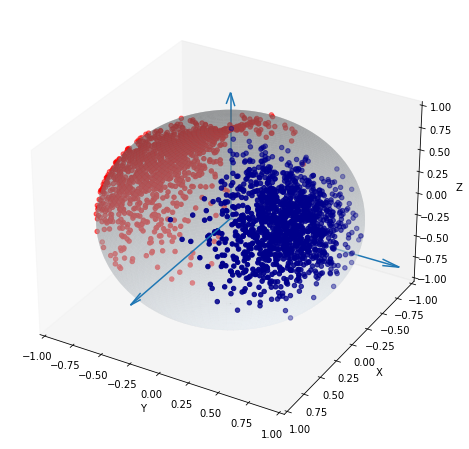

In [13]:
# Plot Qat quantum states as red points and DoQ quantum states as blue points on the Bloch sphere
plot_bloch_qcats_qdogs(x0, y0, z0, x1, y1, z1)

In [14]:
# Check qhack21/hackaton/datas/State preparation.ipynb, cat_states = pet_states(cats_angles)
# Qat statevectors
cat_states = [[0.99324071+0.00000000e+00j, 0.08255545-8.15934028e-02j],
       [0.97119472-5.55111512e-17j, 0.23107236-5.81926412e-02j],
       [0.84095841+6.93889390e-18j, 0.27811285-4.64157522e-01j],
       [0.93835564+0.00000000e+00j, 0.29557339-1.79234637e-01j],
       [0.8784415 +0.00000000e+00j, 0.47349351-6.43772094e-02j]]

In [15]:
# Check qhack21/hackaton/datas/State preparation.ipynb, cat_states = pet_states(cats_angles)
# Save array of Qat statevectors as follows:
# cat_states = npa.array(pet_states(cats_angles))
# npa.savetxt('cat_states_'+distribution+'.csv', cat_states)
# cat_states[:5]

In [16]:
cat_states = npa.loadtxt('cat_states_'+distribution+'.csv', dtype=npa.complex128)

In [17]:
cat_states[:5]

array([[0.99324071+0.00000000e+00j, 0.08255545-8.15934028e-02j],
       [0.97119472-5.55111512e-17j, 0.23107236-5.81926412e-02j],
       [0.84095841+6.93889390e-18j, 0.27811285-4.64157522e-01j],
       [0.93835564+0.00000000e+00j, 0.29557339-1.79234637e-01j],
       [0.8784415 +0.00000000e+00j, 0.47349351-6.43772094e-02j]])

In [18]:
# Check qhack21/hackaton/datas/State preparation.ipynb, pet_states(dogs_angles)
# DoQ statevectors
dog_states = [[ 0.79121397+0.00000000e+00j,  0.25722244+5.54812647e-01j],
       [ 0.97905966+5.55111512e-17j,  0.13028749+1.56420418e-01j],
       [ 0.71816864+0.00000000e+00j, -0.15284997+6.78874572e-01j],
       [ 0.8686613 +5.55111512e-17j,  0.34511521+3.55419521e-01j],
       [ 0.99114411+5.55111512e-17j,  0.06031089+1.18304448e-01j]]

In [19]:
# Check qhack21/hackaton/datas/State preparation.ipynb, dog_states = pet_states(dogs_angles)
# Save array of DoQ statevectors as follows:
# dog_states = npa.array(pet_states(dogs_angles))
# npa.savetxt('dog_states_'+distribution+'.csv', dog_states)
# dog_states[:5]

In [20]:
dog_states = npa.loadtxt('dog_states_'+distribution+'.csv', dtype=npa.complex128)

In [21]:
dog_states[:5]

array([[ 0.79121397+0.00000000e+00j,  0.25722244+5.54812647e-01j],
       [ 0.97905966+5.55111512e-17j,  0.13028749+1.56420418e-01j],
       [ 0.71816864+0.00000000e+00j, -0.15284997+6.78874572e-01j],
       [ 0.8686613 +5.55111512e-17j,  0.34511521+3.55419521e-01j],
       [ 0.99114411+5.55111512e-17j,  0.06031089+1.18304448e-01j]])

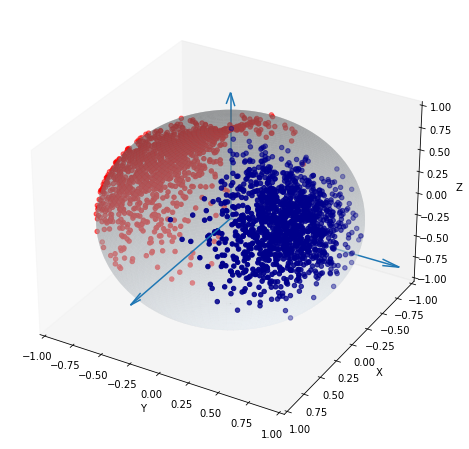

In [22]:
# Get Qat Bloch vector coordinates from their statevectors
statevectors = npa.array(cat_states)
n = npa.shape(statevectors)[0]
x0 = npa.zeros(n)
y0 = npa.zeros(n)
z0 = npa.zeros(n)
for i in range(n):
    (theta, phi, r) = ToBloch(statevectors[i], check_amplitudes = False)
    x0[i] = r[0]
    y0[i] = r[1]
    z0[i] = r[2]

# Get Doq Bloch vector coordinates from their statevectors
statevectors = npa.array(dog_states)
n = npa.shape(statevectors)[0]
x1 = npa.zeros(n)
y1 = npa.zeros(n)
z1 = npa.zeros(n)
for i in range(n):
    (theta, phi, r) = ToBloch(statevectors[i], check_amplitudes = False)
    x1[i] = r[0]
    y1[i] = r[1]
    z1[i] = r[2]

# Plot Qat quantum states as red points and doQ quantum states as blue points on the Bloch sphere
plot_bloch_qcats_qdogs(y0, x0, z0, y1, x1, z1)